<a href="https://colab.research.google.com/github/nagelex/dataa/blob/main/Classes_06_KNN_DT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification: KNN and Decision Tree

Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, balanced_accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid", palette="deep")

import io
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import power_transform

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

In [ ]:
# constans
test_size=0.2
random_state=42

In [ ]:
def compute_score_classification(y_true, y_pred):
  '''
  Helper function for printing scores.

  Parameters:
  y_true: ndarray of y values from original dataset.
  y_pred: ndarray of y values predicted with given model.

  Return:
  dictionary object that consists of accuracy and classification report.

  '''
  return {
        "Accuracy": f"{accuracy_score(y_true, y_pred):.3f}",
        "Classification Report": classification_report(y_true, y_pred),
}

## Load dataset

In [ ]:
df = pd.read_csv('data_neo-ffi_religion.csv')
df['Orthodoxy'] = np.log(df[['Orthodoxy']].to_numpy())
df.head()

,Extraversion,Agreeableness,Conscientiousness,Openness,Neuroticism,External Critique,Orthodoxy,Historical Relativism,Relativism,Second Naïveté
0,34.082439,46.043690,40.788554,461.110426,43.865868,2.838143,2.586507,3.744990,6.093860,4.458938
1,45.914894,45.968433,41.235290,401.384274,28.027017,3.824136,2.294873,3.392507,5.230517,3.269949
2,33.008654,42.065841,42.069170,390.193510,41.023889,2.288471,2.367948,3.765416,4.801786,4.683288
3,56.112153,45.903571,53.080369,468.518727,20.018578,5.824989,2.621076,2.826005,2.592473,0.883451
4,31.972346,49.009174,42.161417,508.686847,43.026028,4.038579,2.736421,4.689029,4.916692,4.627536


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Inspect the dataset

In [ ]:
df.describe()

,Extraversion,Agreeableness,Conscientiousness,Openness,Neuroticism,External Critique,Orthodoxy,Historical Relativism,Relativism,Second Naïveté
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,37.811238,42.318673,41.208357,436.675828,36.042290,3.880765,2.581919,4.883313,5.299550,4.223002
std,8.871624,7.222606,8.104708,63.642560,11.014191,1.259730,1.129017,0.778776,0.944093,1.392345
min,14.040682,21.008399,16.904128,289.257541,12.942666,0.876634,0.816596,1.304512,1.905408,0.801310
25%,32.079634,37.959417,35.084398,388.849925,27.908735,3.046971,1.706643,4.430331,4.729321,3.169300
50%,38.954182,43.089033,41.052187,440.203497,35.908038,3.762668,2.411769,4.922857,5.437686,4.434408
75%,43.946449,47.078293,47.089308,480.501705,44.692161,4.684792,3.334454,5.373428,5.981834,5.213640
max,56.882820,59.121317,59.000430,572.957659,60.030339,6.935906,7.131491,6.877499,7.139185,7.151545


## Exercise 1

Recall the model from the last classes:

*Orthodoxy ~ Extraversion + Agreeableness + Openness + Neuroticism + Conscientiousness*

Now we will perform a classification of our data: based on the results of the Big Five, we will predict membership in one of four cognitive approaches to belief (*Orthodoxy, External Critique, Second Naïvetém, and Relativism*).

To perform classification, we have to create classes. Each participant (sample) must be of a known class.

Create a new column called `'Class'` that store the correct class for a given observation. **Assume that the class of a given observation corresponds to the cognitive style that has the highest value**.

{ do tej pory mamy nateżęnie tych cech, a chemy umieścić osobę w konkretnej klasie}

In [ ]:
# Your code
columns_of_interest = ['Orthodoxy', 'External Critique', 'Relativism', 'Second Naïveté']

def get_max_category(row):
    max_column = max(columns_of_interest, key=lambda col: row[col])
    return max_column.split()[0]

df['Class'] = df.apply(get_max_category, axis=1)
df.head()

,Extraversion,Agreeableness,Conscientiousness,Openness,Neuroticism,External Critique,Orthodoxy,Historical Relativism,Relativism,Second Naïveté,Class
0,34.082439,46.043690,40.788554,461.110426,43.865868,2.838143,2.586507,3.744990,6.093860,4.458938,Relativism
1,45.914894,45.968433,41.235290,401.384274,28.027017,3.824136,2.294873,3.392507,5.230517,3.269949,Relativism
2,33.008654,42.065841,42.069170,390.193510,41.023889,2.288471,2.367948,3.765416,4.801786,4.683288,Relativism
3,56.112153,45.903571,53.080369,468.518727,20.018578,5.824989,2.621076,2.826005,2.592473,0.883451,External
4,31.972346,49.009174,42.161417,508.686847,43.026028,4.038579,2.736421,4.689029,4.916692,4.627536,Relativism


### K-Nearest Neighbours

We have data in the correct format, so we can begin to create a model. Let's statrt from KNN Classifier model. Look into the documentation of [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and write down the code, employing the same patter as in the regression analysis. Do not forget to scale your data (e.g., using [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
To check the classification results, use the predefined `compute_score_classification()` method and print separately each metric. How you interpret the results of the model?

In [ ]:
X = df[[
    'Extraversion',
    'Agreeableness',
    'Conscientiousness',
    'Openness',
    'Neuroticism']]
y = df[['Class']]

df_transformed = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test)

compute_score_classification(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

{'Accuracy': '0.638',
 'Classification Report': '              precision    recall  f1-score   support\n\n    External       0.00      0.00      0.00        10\n  Relativism       0.64      1.00      0.78        44\n      Second       0.00      0.00      0.00        15\n\n    accuracy                           0.64        69\n   macro avg       0.21      0.33      0.26        69\nweighted avg       0.41      0.64      0.50        69\n'}

### Decision Trees

Now, use Decision Tree classifier to predict the PCBS classes. See the documantation of [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and create DT model. Do not forget to scale your data (e.g., using [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)). Compare results of DT and KNN. Which classifier seems to work better?


Save the structure of your DT  into `.dot` file and visualize it using the [WebGraphviz](http://www.webgraphviz.com) tool. You should copy the content of the `.dot` file (saved to the *Files* directory in Colab) to the input area on the [WebGraphviz](http://www.webgraphviz.com).

In [ ]:
X = df[[
    'Extraversion',
    'Agreeableness',
    'Conscientiousness',
    'Openness',
    'Neuroticism']]
y = df[['Class']]

df_transformed = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test)

compute_score_classification(y_test, y_pred)

from sklearn.tree import export_graphviz
# export the decision tree model to a tree_structure.dot file
# paste the contents of the file to webgraphviz.com
export_graphviz(
    dt,
    out_file ='tree_structure.dot',
    feature_names = X.columns.to_numpy()
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

## (Exercise 2)

Now, recall the theory behind the Post-Critical Belief Scale [source](https://theo.kuleuven.be/apps/press/ecsi/files/2019/03/4.-Pollefeyt-Bouwens-PCB-Melb-Vict-for-dummies-EN.pdf). Four classes of cognitive approaches to belief are defined by two dimensions: Exclusion vs. Inclusion of Transcendence and Iteral vs. Symbolic Belief. Defining the class based on the highest value can be suboptimal (it somehow assumes perfect introspection). Think how such two dimensions could be created from the data you have, assuming the theory is (reasonably) correct. Try to define these dimensions and check, whether classification results are improved.

HINT: Think of the values of the four PCBS classes as vectors. Which values should be summed up and which subtracted to obtain Literal/Symbolic and Inclusion/Exclusion dimensions?

In [ ]:
# Your code

## Exercise 3

When you created the KNN and DT model - most of the code (actually all of it, except for the line defining the model) was the same. This is quite a waste of time and space. It also makes it difficult to read, analyze, and refactor the code. The [`Pipelines`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) framework was created exactly for such situations. As sugested by the name, `Pipeline` is a pipe of transforms (functions that somehow transform the data) with a final estimator at the end. According to the documentation, intermediate steps of the pipeline must be *transforms*, that is, they must implement `fit` and `transform` methods (e.g., `StandardScaler`). The final estimator only needs to implement `fit` (e.g., `KNeighborsClassifier`). When you create a pipeline, you can think of this pipeline as a model - in fact, individual data processing steps are already a model, such as scaler, because they often learn from data.

For the sake of simplicity, we'll start with the [`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline) function, which conveniently allows you to create a pipeline. Take a look at the example below:

```
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
model.fit(X,y)
y_pred = model.predict(X)
```

Again, create KNN and DT classifiers, but this time:
1. Define classification estimators beforehand and put them in a list;
2. Use a for loop to ...
3. ... make pipeline that chain scaler with estimator using `make_pipeline()` function.

In [ ]:
X = df[[
    'Extraversion',
    'Agreeableness',
    'Conscientiousness',
    'Openness',
    'Neuroticism']]
y = df[['Class']]

df_transformed = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# using pipeline
knn = Pipeline ([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier(n_neighbors=1))])

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test)

compute_score_classification(y_test, y_pred)

scores =  compute_score_classification(y_test, y_pred)
print(scores ['Classification Report'])

# weithed accuracy - nasze klasy nie są równoliczne, dlatego weithed nam pomoże z uwzględnieniem ilości sampli
#precision -jak odbrze jesteśmy w przeqiadywaniu klasu (ratio true postive do sumy true positive i false positive)

              precision    recall  f1-score   support

    External       0.00      0.00      0.00        10
  Relativism       0.64      1.00      0.78        44
      Second       0.00      0.00      0.00        15

    accuracy                           0.64        69
   macro avg       0.21      0.33      0.26        69
weighted avg       0.41      0.64      0.50        69



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Homework:

In this exercise, we will examine how the number of features analyzed and the value of the model's hyperparameter(s) are related to accuracy. Such an analysis will allow us, for example, to answer the question of how many personality traits (from NEO-FFI) we need to have in order to create a valid model that predicts cognitive belief style. Perhaps we can achieve a similar results with much less data? Alongside, we will examine the effect of hyperparameter values on accuracy depending on the number of features. To do so, you want to randomly select a subset of features (think - why randomly?)from a set of features and test the model's performance on that feature set for, e.g., set of n_neighbors.

HINT: You may want to follow the step list below (for KNN):

Define a list of all possible features (all five scales form NEO-FFI);
Define a list specifying the number of features you might select (intuitively, it's a list from 1 to 5);
Define a list specifying the n_neighbors to be tested (e.g., from 1 to 20);
For each number/size from the list with possible number of features:
4.1. Draw random subset of features (features names) of this size. To do so, you can use `random.sample()` in a following way: random.sample(`list_of_all_possible_features, number_of_features_to_select`) ;

4.2. Create the y set, and X set based on the output of` random.sample()`;

4.3. Perform train-test split, scale X_train and X_test, perform classification, estimate the accuracy (e.g.,` accuracy_score(y_true, y_pred)`), and the average precision (e.g., `precision_score(y_test, y_pred, average='weighted')`);

4.4. Save to results of classification to a dataframe: the number of features that was used in classification, value of k, accuracy, and the average precision;

Do all steps from the (4) n=50 (or more) times and for each k from your list of n_neighbors;
Plot the resultson accuracy and average precision using e.g. `sns.lineplot()` with hue set to number of features.
Do not forget put your comments about the effect of the number of features on accuracy and the relationship between the accuracy and the number of k depending on number of features. Did you learn anything interesting about the relationship between personality traits and cognitive belief style?

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

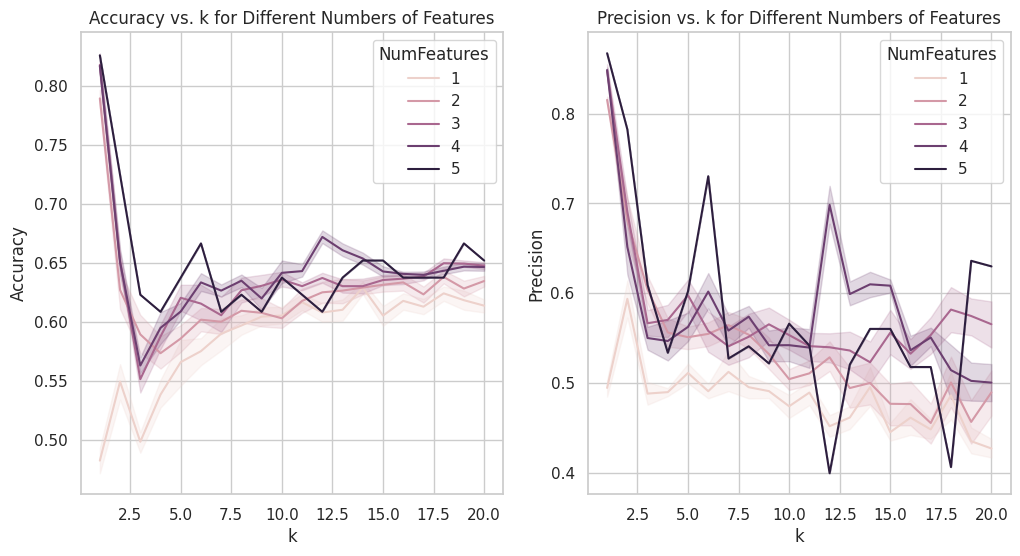

In [ ]:
import random
all_features = [
    'Extraversion',
    'Agreeableness',
    'Conscientiousness',
    'Openness',
    'Neuroticism']

num_features_list = [1, 2, 3, 4, 5]
n_neighbors_list = list(range(1, 21))
results = []

for num_features in num_features_list:
    for _ in range(50):
        selected_features = random.sample(all_features, num_features)
        y = df[['Class']]
        X = df[selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for k in n_neighbors_list:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_scaled, y_train.values.ravel())  # Flatten y_train
            y_pred = knn.predict(X_test_scaled)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')

            results.append({
                'NumFeatures': num_features,
                'k': k,
                'Accuracy': accuracy,
                'Precision': precision
            })

results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
sns.lineplot(data=results_df, x='k', y='Accuracy', hue='NumFeatures')
plt.title('Accuracy vs. k for Different Numbers of Features')

# Plot Precision
plt.subplot(1, 2, 2)
sns.lineplot(data=results_df, x='k', y='Precision', hue='NumFeatures')
plt.title('Precision vs. k for Different Numbers of Features')

plt.show()

